In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Collage(GNU)/Extra_Manan-sir/Data_File/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [6]:
df.shape

(29531, 16)

In [7]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [8]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
len(df)

29531

In [10]:
missing_values=pd.DataFrame(df.isna().sum()/len(df))

In [11]:
missing_values

,0
City,0.000000
Date,0.000000
PM2.5,0.155701
PM10,0.377231
NO,0.121296
NO2,0.121398
NOx,0.141715
NH3,0.349734
CO,0.069723
SO2,0.130507


In [12]:
missing_values.columns=['Proportion']

In [13]:
missing_values=missing_values.sort_values(by='Proportion',ascending=False)

In [14]:
missing_values

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


In [15]:
pd.DataFrame(df.groupby(['City'])[['AQI']].mean())

,AQI
City,
Ahmedabad,452.122939
Aizawl,34.765766
Amaravati,95.299643
Amritsar,119.920959
Bengaluru,94.318325
Bhopal,132.827338
Brajrajnagar,150.280505
Chandigarh,96.498328
Chennai,114.502654


In [16]:
pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))

,AQI
City,
Ahmedabad,452.122939
Delhi,259.487744
Patna,240.782042
Gurugram,225.123882
Lucknow,217.973059
Talcher,172.886819
Jorapokhar,159.251621
Brajrajnagar,150.280505
Kolkata,140.566313


In [17]:
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
print(x)

                     AQI
City                    
Ahmedabad     452.122939
Delhi         259.487744
Patna         240.782042
Gurugram      225.123882
Lucknow       217.973059
Talcher       172.886819
Jorapokhar    159.251621
Brajrajnagar  150.280505
Kolkata       140.566313
Guwahati      140.111111


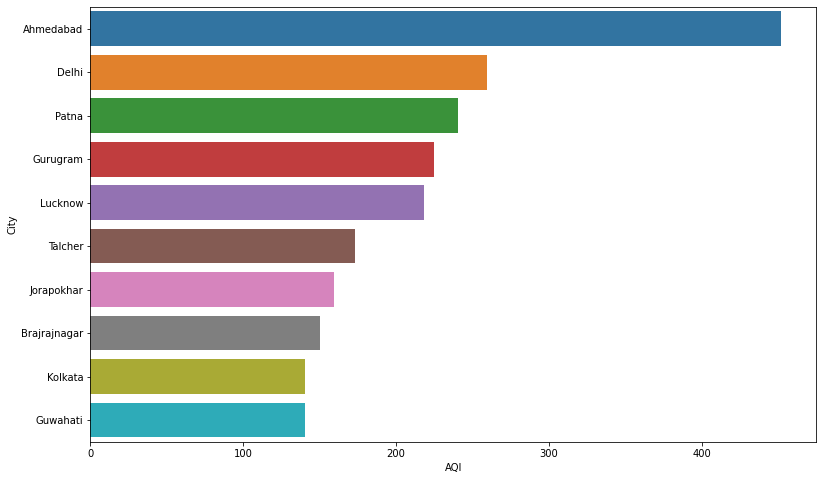

In [18]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
#plt.style.use('ggplot')
plt.figure(figsize=(13,8))
sns.barplot(data=x,x='AQI',y='City',orient='h') ### ,palette='viridis'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [20]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [21]:
#segregating dates into months and years

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

In [22]:
#line plot analysis for amount of particulate matter and gases  over the years
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

In [23]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


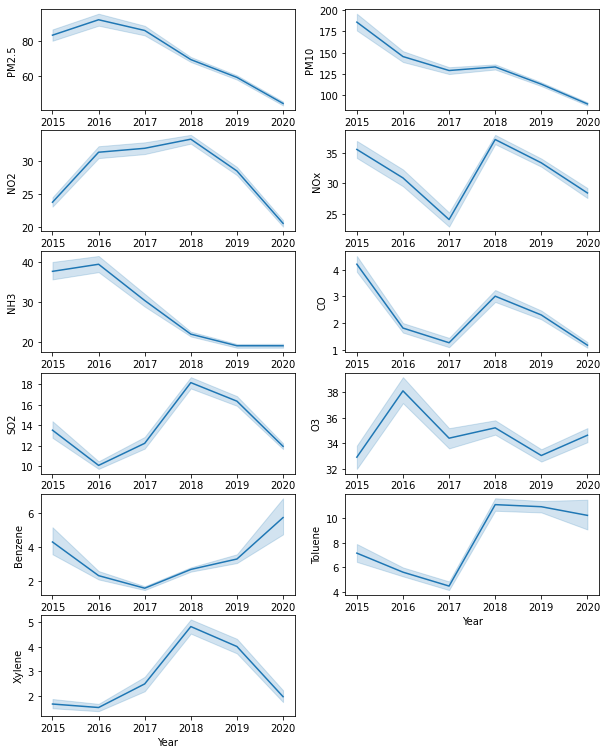

In [24]:
#x=df.iloc[:,2:]
fig=plt.figure(figsize=(10,13))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=df)

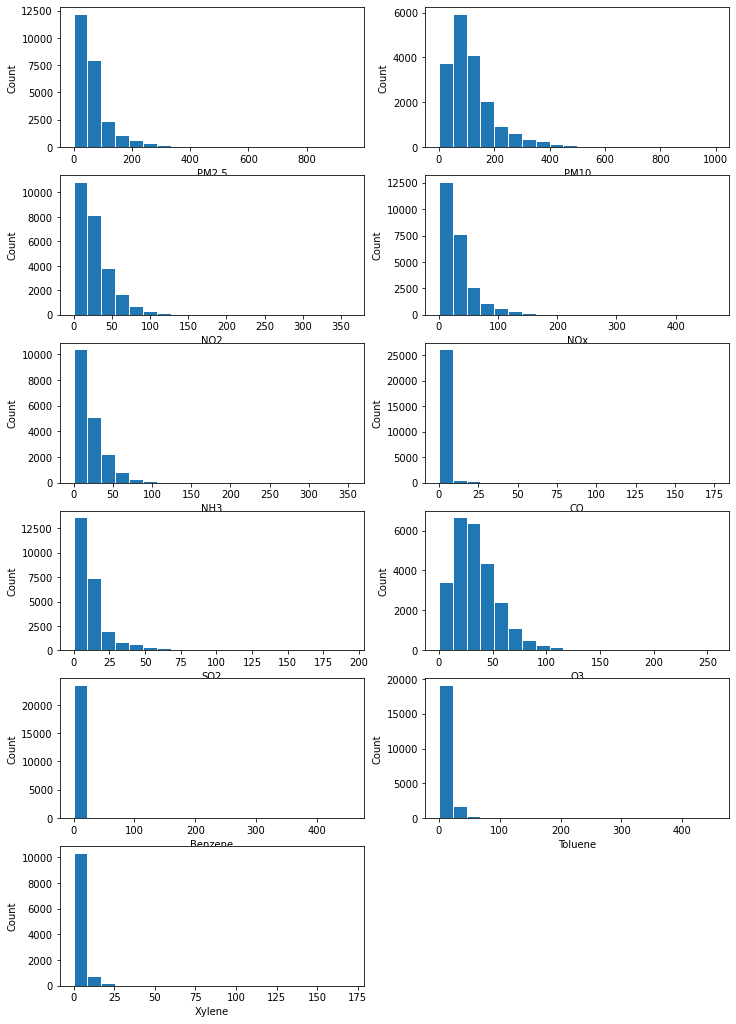

In [25]:
#distribuiton of various gases and particulate in air

cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

fig=plt.figure(figsize=(12,18))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(df[col].dropna(),bins=20,edgecolor='white')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Analysis')

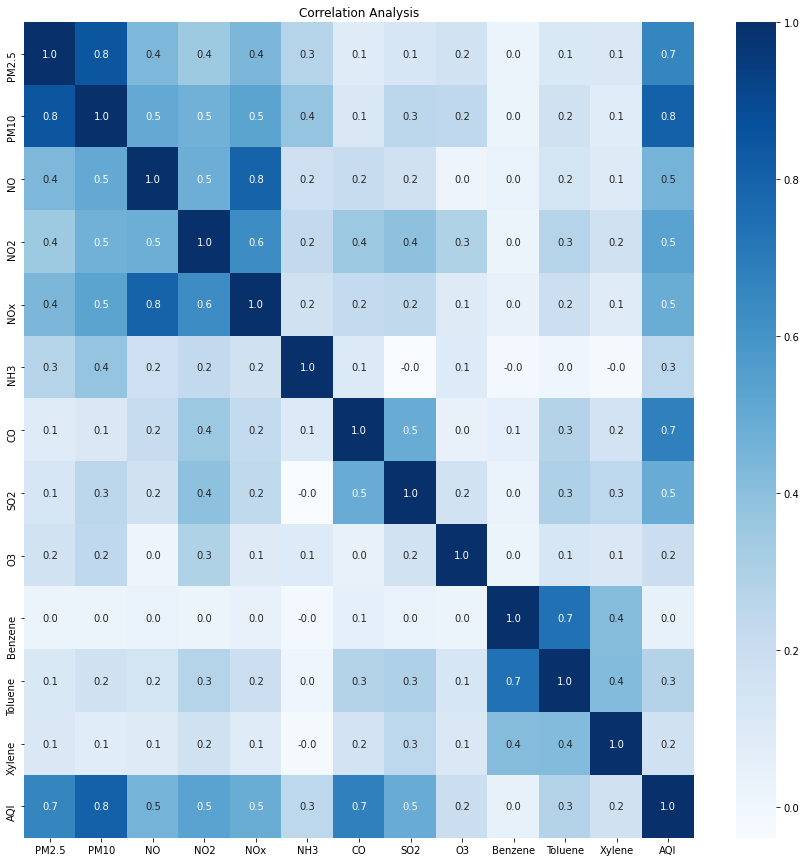

In [26]:
#correlation analysis

plt.figure(figsize=(15,15))

#mask=np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(),
            annot=True,fmt='0.1f',
            cmap='Blues')
plt.title('Correlation Analysis')

In [27]:
df['City'][df['AQI']>=500].value_counts()

Ahmedabad     413
Delhi          48
Patna          26
Gurugram       22
Lucknow        15
Jorapokhar      7
Talcher         4
Hyderabad       4
Amritsar        4
Guwahati        2
Name: City, dtype: int64

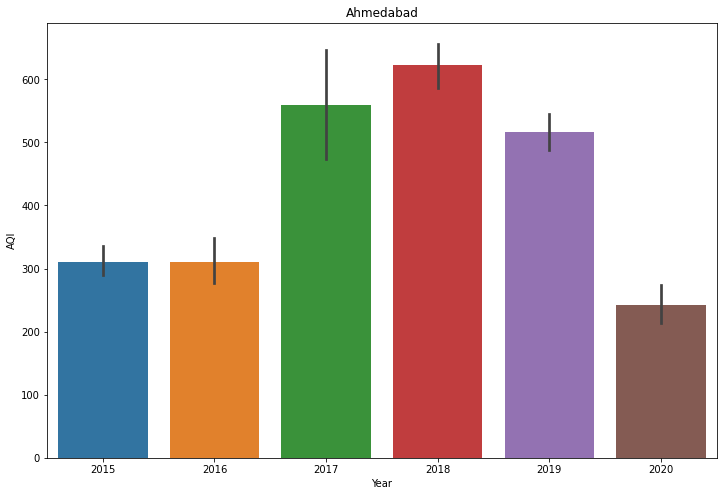

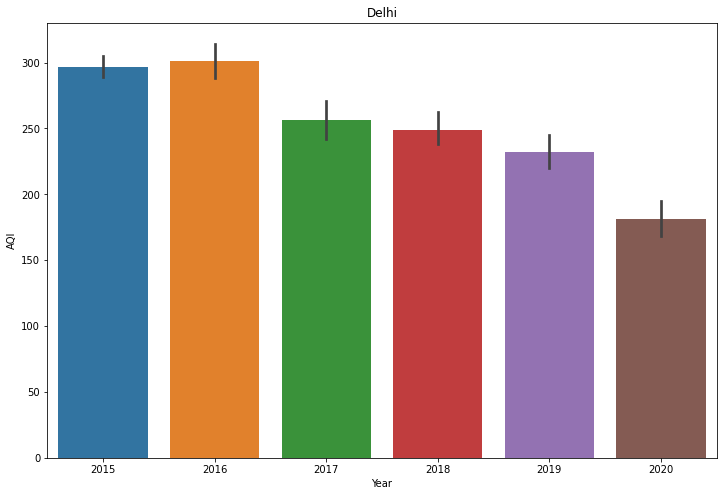

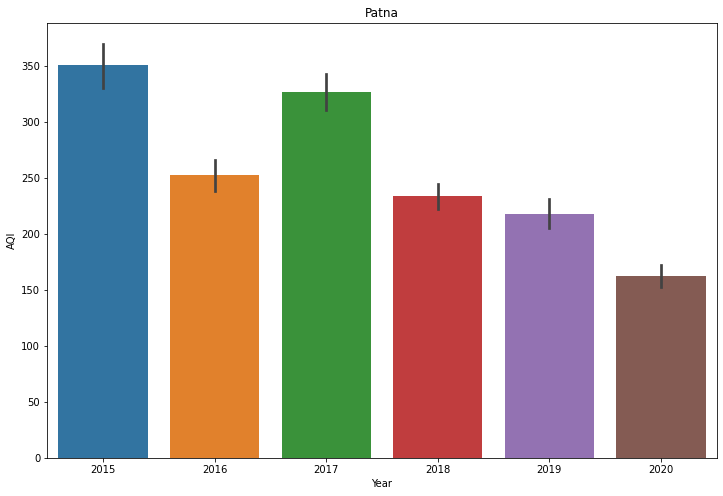

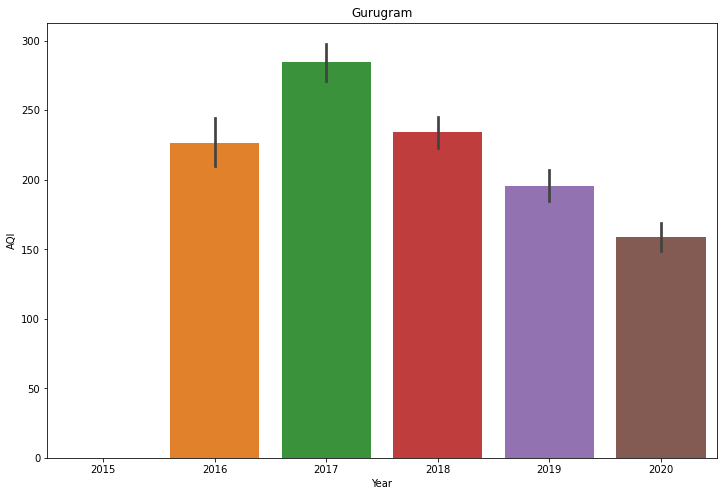

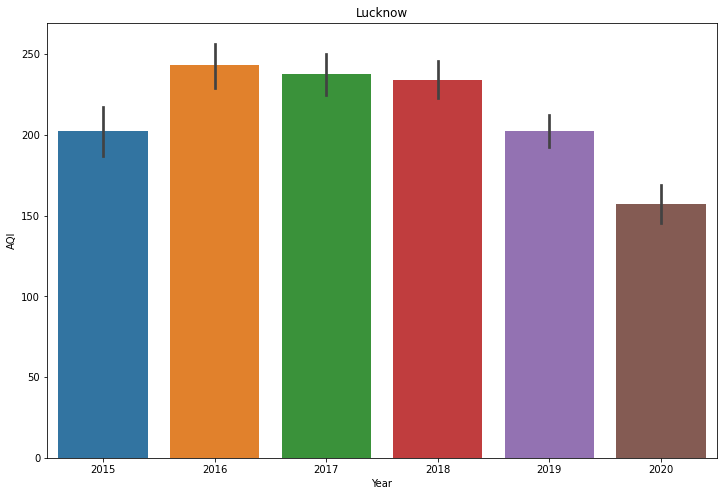

In [28]:
#plotting the average AQI over the years for top 5 cities which have AQI greater than 500

df['City'][df['AQI']>=500].value_counts()

cols=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

for col in cols:
    plt.figure(figsize=(12,8))
    #selecting data pertaining to the selected city
    x=df[df['City']==col]
    sns.barplot(x='Year',y='AQI',data=x)
    plt.title(col)

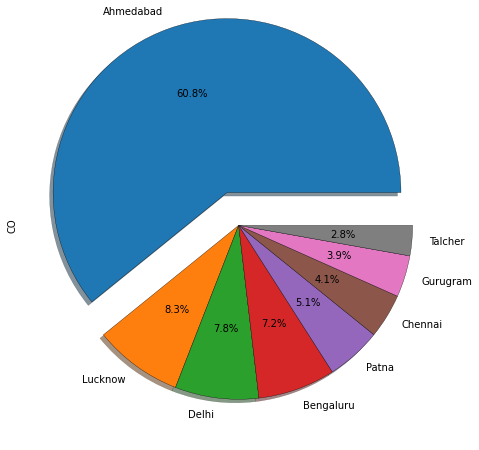

In [29]:
explode=[0.2,0,0,0,0,0,0,0]
plt.figure(figsize=(10,8))

'''grouping above columns by cities and 
taking 8 cities which have the highest sum'''

x=df.groupby('City')['CO'].sum().sort_values(ascending=False)
x.reset_index('City')
x[:8].plot.pie(shadow=True,autopct='%1.1f%%',
                explode=explode,
                wedgeprops={'edgecolor':'black','linewidth':0.3}
                )

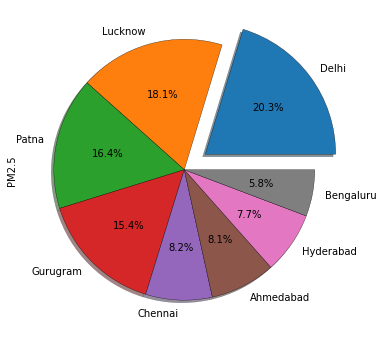

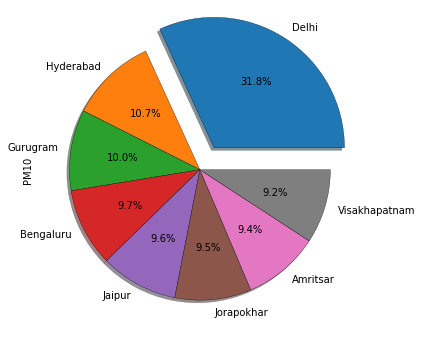

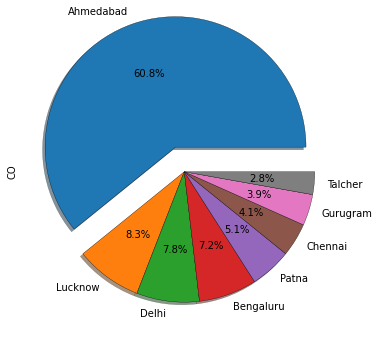

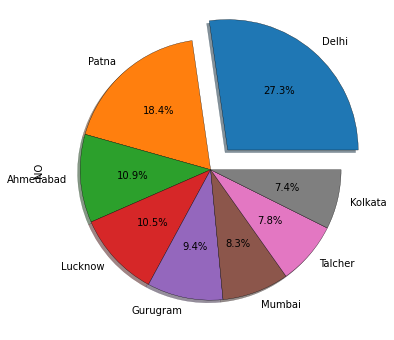

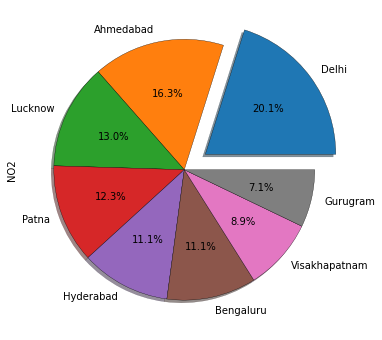

In [30]:
cols=['PM2.5','PM10','CO','NO','NO2']

cmap=plt.get_cmap('Spectral')
explode=[0.2,0,0,0,0,0,0,0]

for col in cols:
    plt.figure(figsize=(8,6))
    
    '''grouping above columns by cities and 
    taking 8 cities which have the highest sum'''
    
    x=df.groupby('City')[col].sum().sort_values(ascending=False)
    x.reset_index('City')
    x[:8].plot.pie(shadow=True,autopct='%1.1f%%',
                   explode=explode,
                   wedgeprops={'edgecolor':'black','linewidth':0.3}
                   )

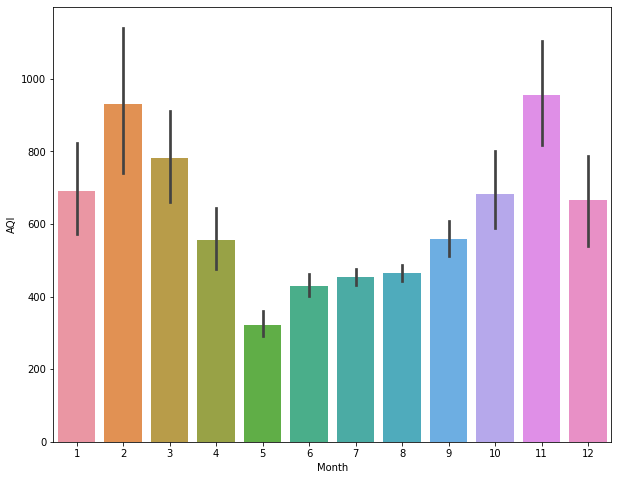

In [31]:
#from above bar plots we see that for Ahmedabad highest avearge AQI is for the year 2018 so let's 
#plot the monthly distribution of AQI for Ahmedabad for the year 2018

x=df[(df['City']=='Ahmedabad') & (df['Year']=='2018')]

plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='AQI',data=x)

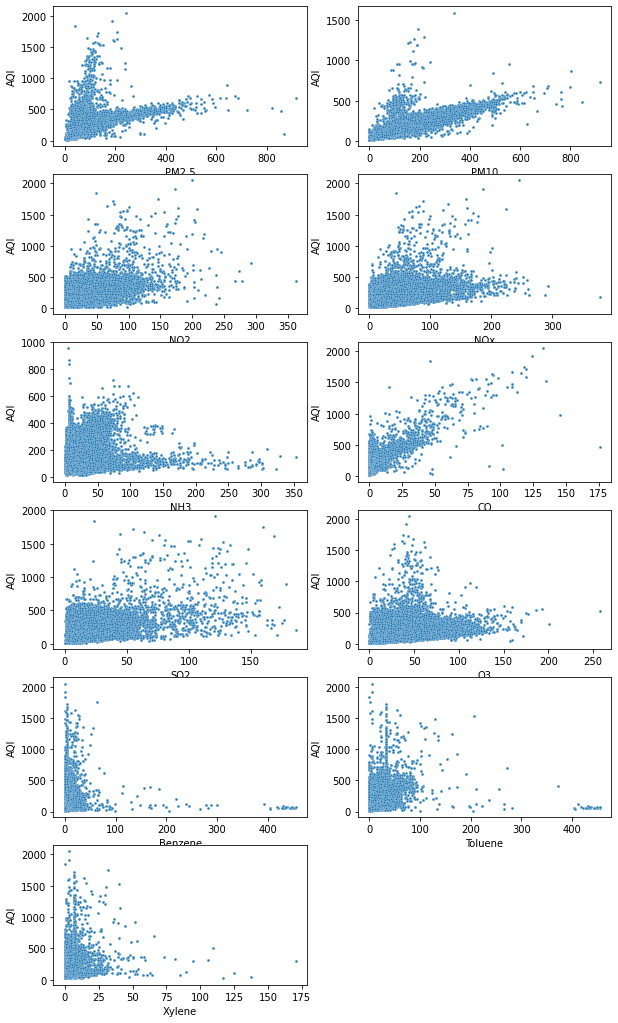

In [32]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

fig=plt.figure(figsize=(10,18))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.scatterplot(x=col,y='AQI',data=df,s=8)
    plt.xlabel(col)
    plt.ylabel('AQI')

#plt.figure(figsize=(2.3,1.5))
#sns.scatterplot(x='Benzene',y='Toluene',data=df,s=8)